In [108]:
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import statistics
import scipy.io
import h5py
import sys
import seaborn as sns
PlottingFormat_Folder = '/home/sheffieldlab/Desktop/NoReward/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
from Rastermap_withunfiltereddata import PlotRaster as r

In [110]:
SaveFigureFolder = '/home/sheffieldlab/Desktop/NoReward/PaperFigures/Figure1/100dpi/'

## CFC4

In [111]:
ExpDirectoryName = '/home/sheffieldlab/Desktop/NoReward/ImagingData/Good_behavior/Dataused/'

In [112]:
isort_filtered = np.load(os.path.join(ExpDirectoryName, 'CFC4', 'isort.npy'))
activecells_filtered = np.load(os.path.join(ExpDirectoryName, 'CFC4', 'activecells.npy'))
corrsort_filtered = np.load(os.path.join(ExpDirectoryName, 'CFC4', 'corrsort.npy'))

In [113]:
activecells_filtered

array([   0,    1,    2, ..., 1881, 1882, 1898])

In [118]:
exptaskframes = {'Task1': [8260, -1],
             'Task2': [0, -7854],
             'Task3': [90, -5843]}
exptaskstoplot = ['Task1', 'Task2', 'Task3']
remove_laps = {'Task1':0, 'Task2':1, 'Task3':0 }

In [119]:
d_exp = r(AnimalName='CFC4', FolderName=ExpDirectoryName,
          SaveFigureFolder=SaveFigureFolder, taskstoplot=exptaskstoplot)
Exp_Fdata = d_exp.combinedata_correct_forraster(exptaskframes, remove_laps)
d_exp.make_rastermap(Exp_Fdata, ncomp=1)

F (1924, 65000)
Fc (1924, 65000)
Fc3 (1924, 65000)
Task1
(6739, 1)
(6739, 1)
(1924, 6739)
Task2
(11735, 1)
(11735, 1)
(1924, 11735)
Task3
(9066, 1)
(9066, 1)
(1924, 9066)
nmin 200
0.09337019920349121
6.785660982131958
7.0897276401519775
7.094650745391846
(28, 30)
(60,)
1.0
time; iteration;  explained PC variance
0.00s     0        0.0536      2
0.04s    10        0.0890      4
0.07s    20        0.1407      8
0.10s    30        0.2171      18
0.13s    40        0.2718      28
0.16s    50        0.2758      28
0.18s   final      0.2759
0.19s upsampled    0.2759
(1924, 27540)


In [120]:
Sorted_data = d_exp.Sm[activecells_filtered, :]
Unactivedata = d_exp.Sm[~np.isin(np.arange(np.size(Exp_Fdata, 0)), activecells_filtered), :]
Sorted_data = Sorted_data[corrsort_filtered, :]
Sorted_data = Sorted_data[isort_filtered, :]
cells_to_use=[[550, 1012], [400, 550], [0, 400]]
Sorted_data = d_exp.crop_Sm_and_sort(cells_to_use=cells_to_use, tosort=Sorted_data)
AllData = np.vstack((Sorted_data, Unactivedata))

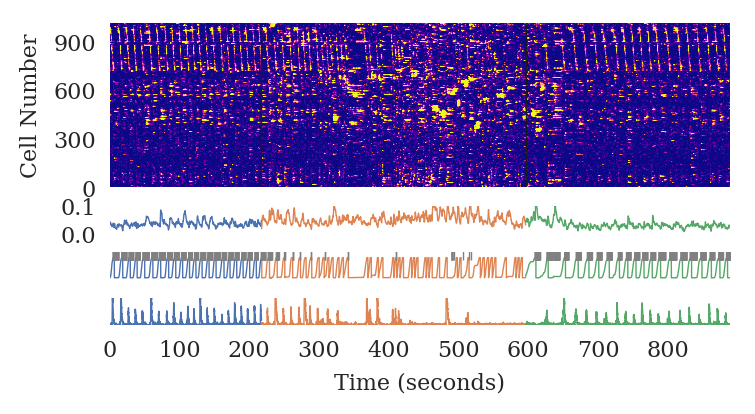

In [121]:
fs, ax = plt.subplots(4, sharex='all', dpi = 200, gridspec_kw={'height_ratios':[3, 0.5, 0.5, 0.5], 'hspace':0.3})
d_exp.plot_rastermap (fs, ax, fdata=Sorted_data, rasterdata=Sorted_data, crop_cellflag=0, ylim_meandff=0.1)
fs.set_size_inches((4, 2))
d_exp.plot_samplecells([316], axis=ax[3])
fs.savefig(os.path.join(SaveFigureFolder, 'RasterMap_CFC4_Allcells_withmeandff_unfiltered.pdf'),
           bbox_inches='tight', transparent=True)

In [ ]:
#Plot place cells in no reward condition
PFData = Exp_Fdata[d_exp.PlaceCells['sig_PFs_cellnum'].item()['Task1'], :]
d_exp.make_rastermap(PFData, ncomp=1)

In [ ]:
fs, ax = plt.subplots(3, sharex='all', dpi = 300, gridspec_kw={'height_ratios':[2, 0.5, 0.5], 'hspace':0.3})
d_exp.plot_rastermap(fs, ax, fdata=PFData, crop_cellflag=0, ylim_meandff=0.2)
# ax[0].set_xlim((0, 50))
fs.set_size_inches((4, 2))

In [ ]:
fs, ax = plt.subplots(3, sharex='all', dpi = 300, gridspec_kw={'height_ratios':[2, 0.5, 0.5], 'hspace':0.3})
d_exp.plot_rastermap(fs, ax, fdata=SkewData, crop_cellflag=0, ylim_meandff=0.1)
# ax[0].set_xlim((0, 50))
fs.set_size_inches((4, 2))